<a href="https://colab.research.google.com/github/Kiron-Ang/DFHL/blob/main/cortisol_grief.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# This IPYNB file was created with Google Colab by Kiron Ang
# Print Python version and install/update/import libraries!
!python -V

!pip install -U polars > output.txt
import polars
print("polars", polars.__version__)

!pip install -U matplotlib > output.txt
import matplotlib
print("matplotlib", matplotlib.__version__)

!pip install -U seaborn > output.txt
import seaborn
print("seaborn", seaborn.__version__)

!pip install -U statsmodels > output.txt
import statsmodels
print("statsmodels", statsmodels.__version__)

# Do not upgrade numpy because Google Colab will return an error
import numpy
print("numpy", numpy.__version__)

Python 3.10.12
polars 1.9.0
matplotlib 3.7.1
seaborn 0.13.2
statsmodels 0.14.4
numpy 1.26.4


In [2]:
# read_csv() to store data in a Polars DataFrame
cortisol = polars.read_csv("cortisol - cleansed.csv")
cortisol = cortisol.drop_nulls()
print("cortisol", cortisol.shape)
print("cortisol contains", cortisol.columns)

cortisol (21587, 14)
cortisol contains ['record_id', 'person_id', 'name', 'cortisol', 'year', 'month', 'day', 'collection', 'awakening', 'collection_minutes', 'awakening_minutes', 'difference_minutes', 'age', 'gender']


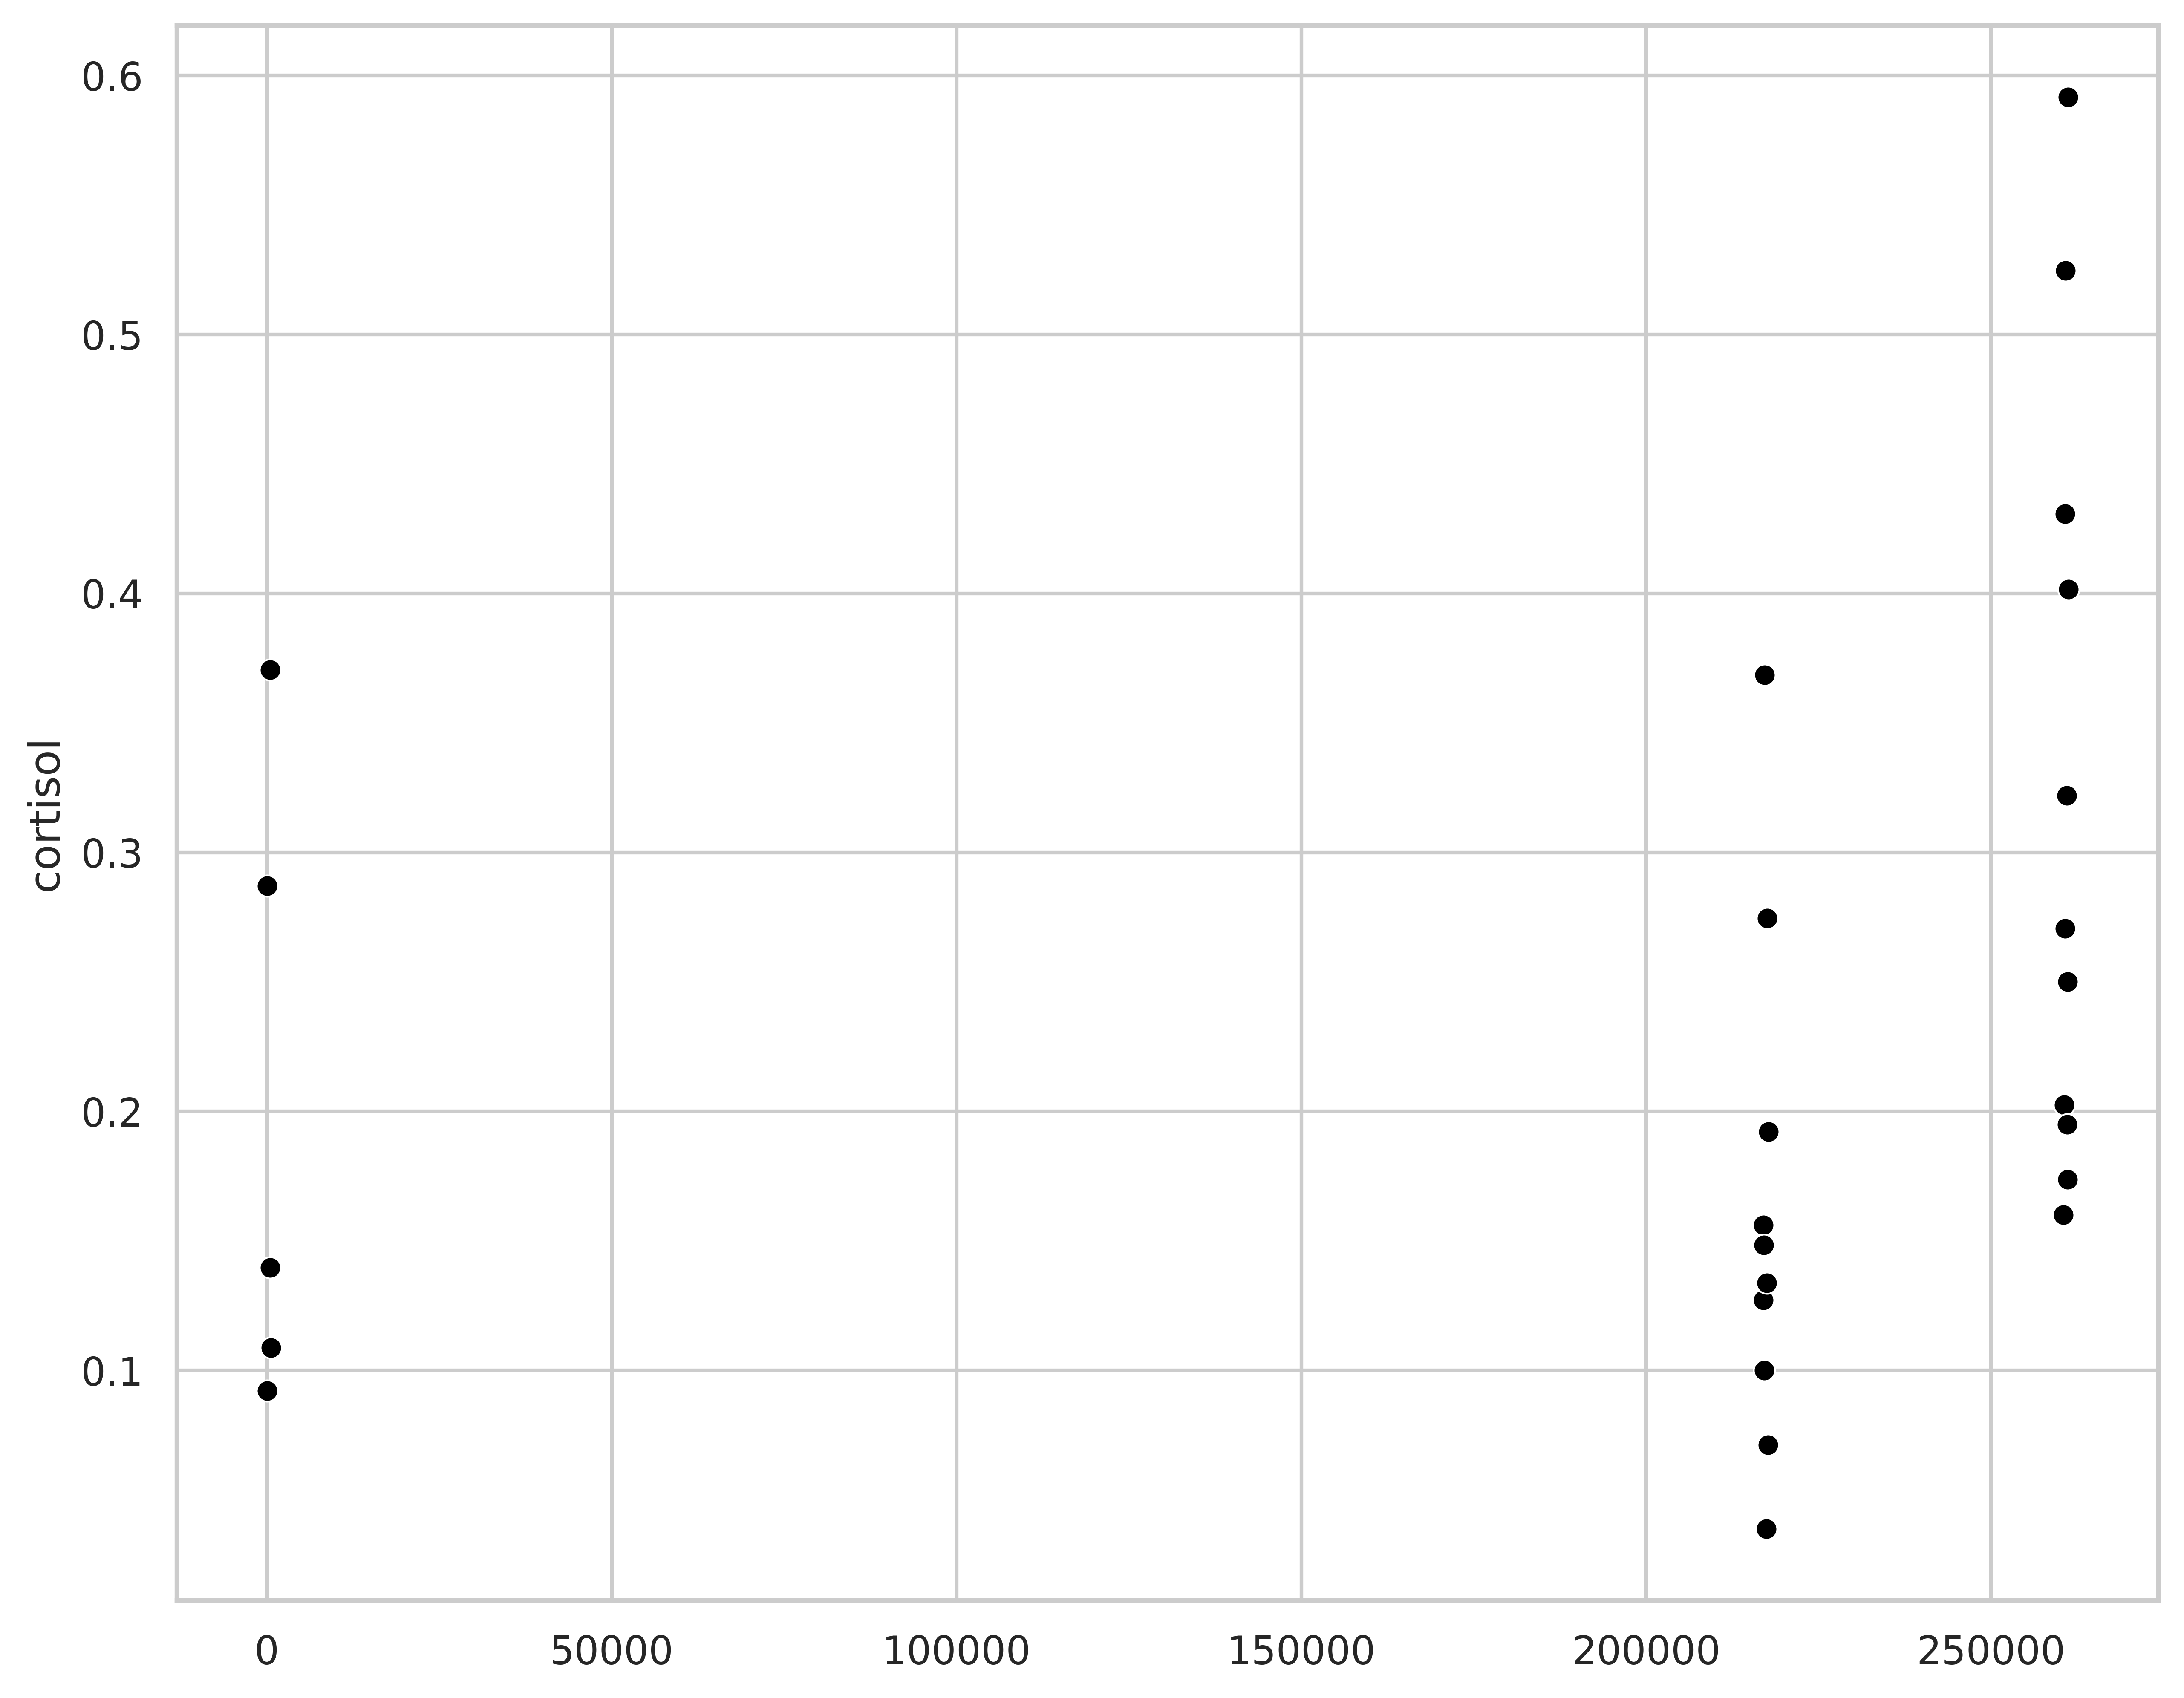

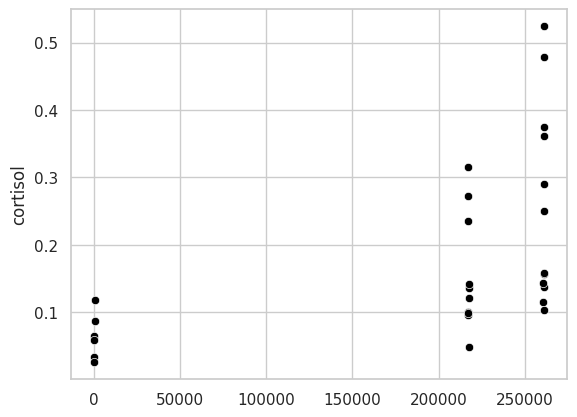

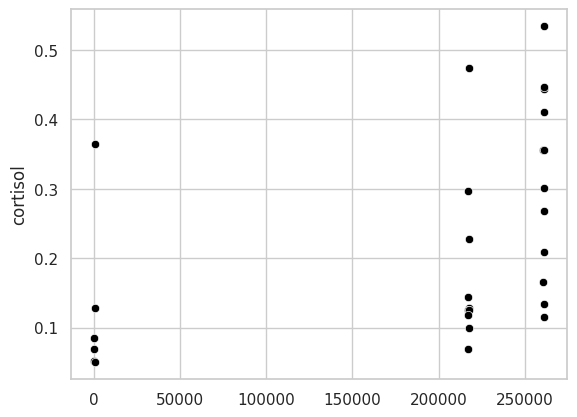

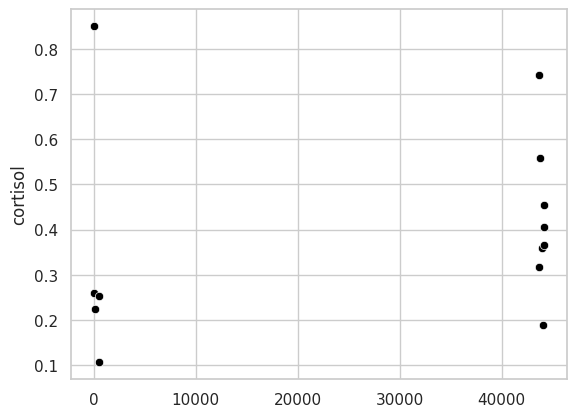

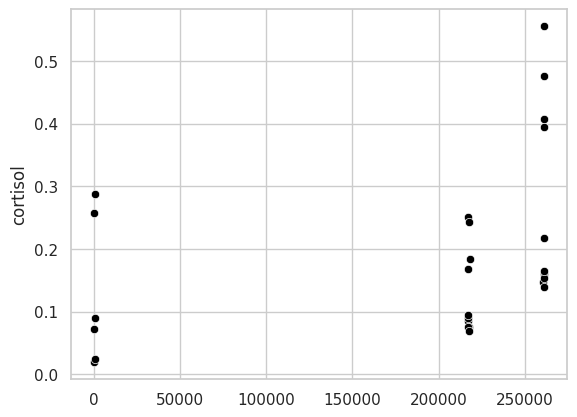

In [26]:
# Create a scatter plot with matplotlib.pyplot and seaborn
import matplotlib.pyplot

seaborn.set_theme(style="whitegrid")

# Control figure size and resolution with matplotlib.pyplot.figure
matplotlib.pyplot.figure(figsize = (10, 8), dpi = 600)

# S is Son, D is Daughter
family_1 = [151756224, 312288096, 710554240, 410631648, 437663904] # FAMILY 1: S1, D1, S2, D2, D3
family_2 = [980003264, 533873088, 106369672, 676175872, 575183808] # FAMILY 2: S1, S2, S3, S4, D1
family_3 = [412766816, 712730496, 207561136, 633178880] # FAMILY 3: D1, S1, S2, S3

for id in family_1:

  lineplot_data = cortisol.filter(polars.col("person_id") == id)
  lineplot_data = lineplot_data.filter(polars.col("year") == 1994)

  # Only keep values in the same year as the grief events. All the events happened in the summer.
  lineplot_cortisol = lineplot_data["cortisol"]

  # Sort the dataframe by year, month, day, collection_minutes
  # So the earliest collection time for the person is the very first entry!
  lineplot_data = lineplot_data.sort("collection_minutes")
  lineplot_data = lineplot_data.sort("day")
  lineplot_data = lineplot_data.sort("month")
  lineplot_data = lineplot_data.sort("year")

  # Create numpy arrays from columns related to the date/time of sample collection
  # and then create a new array to store seconds since the first time of collection

  minutes_since_midnight = lineplot_data["collection_minutes"].to_numpy()
  year = lineplot_data["year"].to_numpy()
  month = lineplot_data["month"].to_numpy()
  day = lineplot_data["day"].to_numpy()

  # Store the first collection time for this person in minutes
  # Assume years have 365 days and months have 30 days
  first_collection = (year[0] * 365 * 24 * 60 +
                      month[0] * 30 * 24 * 60 +
                      day[0] * 60 +
                      minutes_since_midnight[0])

  minutes = (year * 365 * 24 * 60 +
            month * 30 * 24 * 60 +
            day * 60 +
            minutes_since_midnight)

  lineplot_time = minutes - first_collection

  scatterplot = seaborn.scatterplot(
      y = lineplot_cortisol,
      x = lineplot_time,
      color = "black"
  )

  matplotlib.pyplot.show()

In [ ]:
"""
lineplot = seaborn.lineplot(
    y = lineplot_cortisol,
    x = lineplot_time,
    s = 20,
    color = "black"
)

# Plot a red line representing the robust linear model
# with plot(independent variable, dependent variable)
matplotlib.pyplot.plot(bdi_scores, rlm.predict(rlm_bdi_scores), color = 'red')

# Add labels to the plot
matplotlib.pyplot.ylabel("Salivary Cortisol Concentration (µg/dL)", fontsize = 12)
matplotlib.pyplot.xlabel("Time", fontsize = 12)

lineplot.figure.savefig("cortisol_grief_kiron.png", dpi=600, bbox_inches='tight')
"""